# SVD图像降维

In [1]:
from scipy import misc
import numpy as np
img = misc.face()
print(type(img), img.shape)
print(img[0][0])

<class 'numpy.ndarray'> (768, 1024, 3)
[121 112 131]


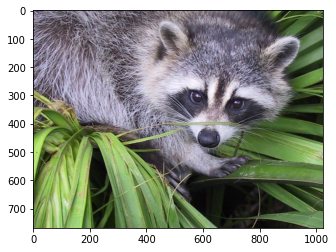

In [2]:
import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()

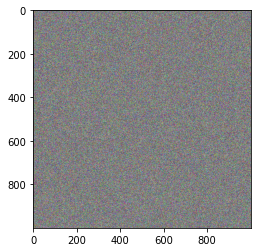

In [3]:
import IPython.display as display

while(1):
	a = np.random.randint(0, 256, size=(1000, 1000, 3))
	plt.imshow(a)
	plt.show()
	display.clear_output(wait=True)
	break

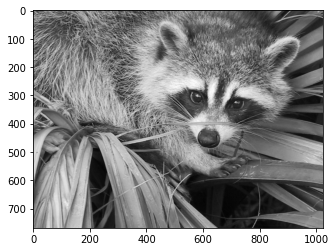

In [4]:
img_array = img/255
red = img_array[:, :,  0]
green = img_array[:, :, 1]
blue = img_array[:, :, 2]
img_gray = img_array@[0.2126, 0.7152, 0.0722]
plt.imshow(img_gray, cmap='gray')
plt.show()

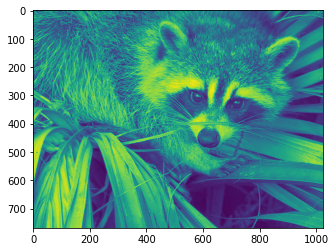

In [5]:
plt.imshow(green*255)
plt.show()

误差： 1.5018325847172386e-12
是否元素接近： True


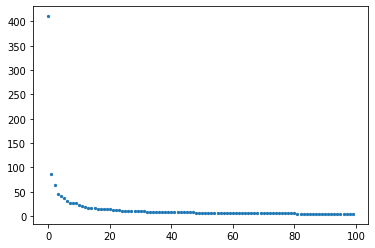

In [6]:
U, s, Vt = np.linalg.svd(img_gray)
Sigma = np.zeros(img_gray.shape)
np.fill_diagonal(Sigma, s)
# 分解后的s不能直接用，需要先生成Sigma
print("误差：", np.linalg.norm(img_gray-U@Sigma@Vt))
print("是否元素接近：", np.allclose(img_gray, U@Sigma@Vt))
plt.scatter(np.arange(100), s[:100], s=5)
plt.show()

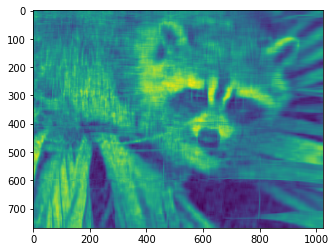

In [7]:
k = 20
approx = U@Sigma[:, :k]@Vt[:k, :]
plt.imshow(approx)
plt.show()

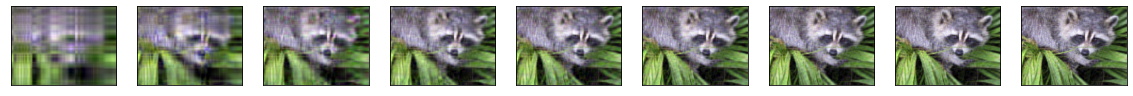

In [8]:
img_tran = np.transpose(img_array, (2, 0, 1))
U, s, Vt = np.linalg.svd(img_tran)
# 按照最后两个维度来奇异值分解
Sigma = np.zeros(img_tran.shape)
for i in range(3):
	np.fill_diagonal(Sigma[i, :, :], s[i, :])
plt.rcParams['figure.figsize'] = (20.0, 20.0)
for i in range(1, 10):
	k = i*3
	approx = U@Sigma[:, :, :k]@Vt[:, :k, :]
	# 去掉超范围数据
	approx = np.clip(approx, 0, 1)
	approx = np.transpose(approx, (1, 2, 0))

	plt.subplot(1, 9, i)
	plt.imshow(approx)
	plt.xticks([])
	plt.yticks([])
plt.show()


# PCA

In [14]:
plt.rcParams['figure.figsize'] = (5.0,5.0)
import numpy as np
x=np.array([2.5,0.5,2.2,1.9,3.1,2.3,2,1,1.5,1.1])
y=np.array([2.4,0.7,2.9,2.2,3,2.7,1.6,1.1,1.6,0.9])
mean_x=np.mean(x)
mean_y=np.mean(y)
scaled_x=x-mean_x
scaled_y=y-mean_y
data=np.matrix([[scaled_x[i],scaled_y[i]] for i in range(len(scaled_x))])

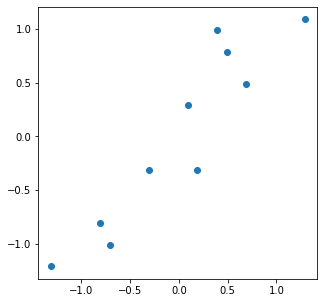

[[0.61655556 0.61544444]
 [0.61544444 0.71655556]]


In [15]:
import matplotlib.pyplot as plt
plt.plot(scaled_x,scaled_y,'o') 
plt.show()   
cov=np.cov(scaled_x,scaled_y)
print(cov)

In [16]:
# 散度矩阵 就是协方差矩阵乘以（总数据量-1）
np.dot(np.transpose(data),data)

matrix([[5.549, 5.539],
        [5.539, 6.449]])

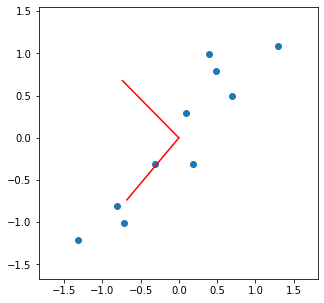

In [17]:
eig_val, eig_vec = np.linalg.eig(cov)
plt.plot(scaled_x,scaled_y,'o',)
xmin ,xmax = scaled_x.min(), scaled_x.max()
ymin, ymax = scaled_y.min(), scaled_y.max()
dx = (xmax - xmin) * 0.2
dy = (ymax - ymin) * 0.2
plt.plot([eig_vec[:,0][0],0],[eig_vec[:,0][1],0],color='red')
plt.plot([eig_vec[:,1][0],0],[eig_vec[:,1][1],0],color='red')

# #设置坐标轴刻度
# my_x_ticks = np.arange(-5, 5, 0.5)
# #对比范围和名称的区别
# #my_x_ticks = np.arange(-5, 2, 0.5)
# my_y_ticks = np.arange(-5, 5, 0.5)
# plt.xticks(my_x_ticks)
# plt.yticks(my_y_ticks)

plt.xlim(xmin - dx, xmax + dx)
plt.ylim(ymin - dy, ymax + dy)
plt.show()

(10, 1)


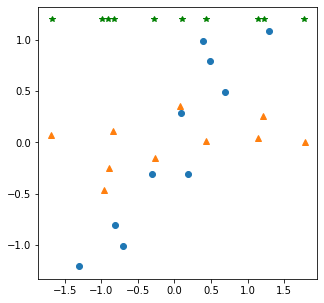

In [36]:
new_data=np.transpose(np.dot(eig_vec,np.transpose(data)))
print(new_data[:, 0].shape)
plt.plot(scaled_x,scaled_y,'o') 
plt.plot(new_data[:, 0], new_data[:, 1], '^')
eig_pairs = [(np.abs(eig_val[i]), eig_vec[:,i]) for i in range(len(eig_val))]
eig_pairs.sort(reverse=True)  # 按照特征值排序
feature=eig_pairs[0][1]  # 找到最大的特征向量
new_data_reduced=np.transpose(np.dot(feature,np.transpose(data))) #在最大方向上的投影
plt.plot(new_data_reduced[:,0],[1.2]*10,'*',color='green')  # 信息最小化的降维
plt.show()